In [21]:

# Let's add some data to a dataframe.

import requests
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Intitialise data of lists
data = [{'Month': '2020-01-01', 'Expense':1000, 'ID':'123'}, 
       {'Month': '2020-02-01', 'Expense':3000, 'ID':'123'},
       {'Month': '2020-03-01', 'Expense':2000, 'ID':'123'}, 
       {'Month': '2020-01-01', 'Expense':3000, 'ID':'456'},
       {'Month': '2020-02-01', 'Expense':5000, 'ID':'456'}, 
       {'Month': '2020-03-01', 'Expense':10000, 'ID':'456'},
       {'Month': '2020-03-01', 'Expense':5000, 'ID':'789'},
       {'Month': '2020-04-01', 'Expense':2000, 'ID':'789'},
       {'Month': '2020-05-01', 'Expense':3000, 'ID':'789'}]
df = pd.DataFrame(data)
df


,Month,Expense,ID
0,2020-01-01,1000,123
1,2020-02-01,3000,123
2,2020-03-01,2000,123
3,2020-01-01,3000,456
4,2020-02-01,5000,456
5,2020-03-01,10000,456
6,2020-03-01,5000,789
7,2020-04-01,2000,789
8,2020-05-01,3000,789


In [22]:

# Let's pivot the dataframe so we can iterate through the columns of the object

df_test = df.pivot(index='Month', columns='ID', values='Expense')
df_test


ID,123,456,789
Month,,,
2020-01-01,1000.0,3000.0,NaN
2020-02-01,3000.0,5000.0,NaN
2020-03-01,2000.0,10000.0,5000.0
2020-04-01,NaN,NaN,2000.0
2020-05-01,NaN,NaN,3000.0


In [28]:

import plotly.io as pio
pio.renderers.default = 'iframe'


In [30]:

# Now, we can start to do our interactive plotting
  
# plotly
import plotly.graph_objs as go
fig = go.Figure()

# set up ONE trace
fig.add_trace(go.Scatter(x=df_test.index,
                         y=df_test[df_test.columns[0]],
                         visible=True)
             )

updatemenu = []
buttons = []

# button with one option for each dataframe
for i in df_test.columns:
    # print(i)
    buttons.append(dict(method='restyle',
                        label=i,
                        visible=True,
                        args=[{'y':[df_test[i]],
                               'x':[df_test.index],
                               'type':'scatter'}, [0]],
                        )
                  )
    
# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True


# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()


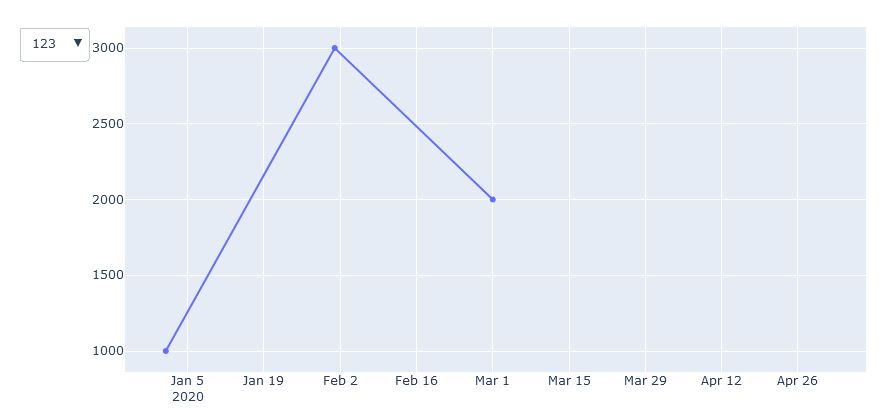

In [31]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryans\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\\Plotly Dropdown Control Based on Unique Items in a Dataframe Column\\"
Image(filename = PATH + "1.JPG")


In [17]:

# sources of inspiration
# https://plotly.com/python/dropdowns/
# https://stackoverflow.com/questions/59406167/plotly-how-to-filter-a-pandas-dataframe-using-a-dropdown-menu
